# Investigate a Dataset

## Hydrocarbons dependencies and purchase power for North America

### *Udacity Data Analysis Nanodegree*

## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Objective">Objective</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Intro'></a>
## Introduction

For most countries, their economies growth reflects the quality of life of their citizens, in terms of their acquisition power. Nonetheless, the GDP per capita is expected to be directly related with the amount of energy that each of their citizens can use to generate capital, and therefore, with the amount of hydrocarbons produced to generate energy. This is the importance to fully understand that relationship, to analyze the dependency that remains on the hydrocarbons to increase the economic growth for most of the countries.


<a id='Objective'></a>
## Objective <a class="anchor" id="objective"></a>


The goal of this project is to present a detailed analysis of the North America countries dependencies to the use of hydrocarbons for the increment of their economies and their quality of lives. For this, data obtained from many countries were used, related with their GDPs, populations, production of hydrocarbons and use of energy. 

To be more specific, the objective of this project is to show how related are the GDP and the use of energy, based on the production of hydrocarbons, for the North America countries. Additionally, to show how much acquisition power their citizens have based on the amount of energy produced, considering the GDP per capita as their acquisition power.  

Information about the mentioned variables were obtained from the updated https://www.gapminder.org/data/ data. Data associated with the production of hydrocarbons and use of energy are presented as tones of barrels of equivalent oil (TOE), while data related with the GDP is presented as international dollars (Dollars).


<a id='wrangling'></a>
## Data Wrangling

The data is imported as Pandas dataframes, obtained from the previosly mentioned webpage. The names of files obtained can be observed when loading the data in *csv* format.

### Importing libraries and loading the data for the analysis

In [1]:
#Importing libraries to be used in the analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt

#Finding the path were the data is stored
path = os.path.join(os.getcwd(),'Data')

#Loading data obtained for the analysis
Population = pd.read_csv(os.path.join(path,'population_total.csv'))
GDP = pd.read_csv(os.path.join(path,'total_gdp_us_inflation_adjusted.csv'))
Oil_prod = pd.read_csv(os.path.join(path,'oil_production_total.csv'))
Gas_prod = pd.read_csv(os.path.join(path,'natural_gas_production_total.csv'))
Ener_use = pd.read_csv(os.path.join(path,'energy_use_total.csv'))

Example of the loaded data:

In [2]:
GDP.head(10)

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.210000e+10,1.470000e+10,1.590000e+10,1.690000e+10,1.940000e+10,2.010000e+10,2.060000e+10,2.090000e+10,2.140000e+10,2.200000e+10
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.110000e+10,1.150000e+10,1.190000e+10,1.220000e+10,1.240000e+10,1.250000e+10,1.280000e+10,1.300000e+10,1.350000e+10,1.400000e+10
2,Algeria,2.740000e+10,2.370000e+10,1.900000e+10,2.560000e+10,2.710000e+10,2.870000e+10,2.740000e+10,2.990000e+10,3.320000e+10,...,1.530000e+11,1.560000e+11,1.610000e+11,1.660000e+11,1.710000e+11,1.760000e+11,1.830000e+11,1.900000e+11,1.960000e+11,1.990000e+11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.680000e+09,3.550000e+09,3.360000e+09,3.200000e+09,3.150000e+09,3.160000e+09,3.230000e+09,3.260000e+09,3.320000e+09,3.380000e+09
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.790000e+10,7.980000e+10,8.250000e+10,8.570000e+10,9.020000e+10,9.630000e+10,1.010000e+11,1.040000e+11,1.030000e+11,1.040000e+11
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.410000e+09,1.240000e+09,1.150000e+09,1.130000e+09,1.170000e+09,1.170000e+09,1.230000e+09,1.280000e+09,1.340000e+09,1.390000e+09
6,Argentina,1.160000e+11,1.220000e+11,1.210000e+11,1.140000e+11,1.260000e+11,1.390000e+11,1.380000e+11,1.430000e+11,1.500000e+11,...,4.090000e+11,3.850000e+11,4.240000e+11,4.490000e+11,4.440000e+11,4.550000e+11,4.440000e+11,4.560000e+11,4.480000e+11,4.600000e+11
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.060000e+10,9.060000e+09,9.260000e+09,9.700000e+09,1.040000e+10,1.070000e+10,1.110000e+10,1.150000e+10,1.150000e+10,1.240000e+10
8,Australia,1.990000e+11,2.040000e+11,2.070000e+11,2.200000e+11,2.350000e+11,2.490000e+11,2.550000e+11,2.710000e+11,2.850000e+11,...,1.100000e+12,1.120000e+12,1.140000e+12,1.170000e+12,1.220000e+12,1.250000e+12,1.280000e+12,1.310000e+12,1.350000e+12,1.380000e+12
9,Austria,9.180000e+10,9.690000e+10,9.950000e+10,1.040000e+11,1.100000e+11,1.140000e+11,1.200000e+11,1.240000e+11,1.290000e+11,...,4.000000e+11,3.850000e+11,3.920000e+11,4.030000e+11,4.060000e+11,4.060000e+11,4.100000e+11,4.140000e+11,4.200000e+11,4.330000e+11


As can be observed, the loaded data contains more countries than the required and undefined values which increase the uncertainty of the analysis. Moreover, the loaded dataframes do not possess information for the same dates or the same countries, as can be observed by getting the shapes and the number of *nan* values for each of the generated dataframes:

In [3]:
Dataframes = [GDP, Population, Ener_use, Oil_prod, Gas_prod]
Names = ['GDP', 'Population', 'Ener_use', 'Oil_prod', 'Gas_prod']
NanVals = [GDP.isnull().values.sum(), Population.isnull().values.sum(), Ener_use.isnull().values.sum(),
           Oil_prod.isnull().values.sum(), Gas_prod.isnull().values.sum()]

Structures = np.zeros(shape=(5,3), dtype=int)
for n in range(len(Dataframes)):
    Structures[n,:] = [Dataframes[n].shape[0], Dataframes[n].shape[1], NanVals[n]]
    
display(pd.DataFrame({'Dataframe':Names,'Countries':Structures[:,0],'Dates':Structures[:,1],'NaN':Structures[:,2]}))


,Dataframe,Countries,Dates,NaN
0,GDP,190,59,2481
1,Population,195,220,0
2,Ener_use,275,53,8920
3,Oil_prod,49,53,318
4,Gas_prod,49,48,90


Then, a reduction of the loaded data and the nan values is required. 

### Reducing the amount of data (rows)

The amount of data is reduced by focusing the analysis on the twenty countries with more GDP during the most recent date of the data obtained (2017), which includes the countries of interest. The countries with most GDP are found by a descending sorting of the GDP dataframe values for the 2017 date column.

Once the data was sorted, a vector with the names of the 20 countries with more GDP during 2017 is created, to be used as indices to filter the data of the rest of the created datasets.


In [4]:
#Importing custom function to reduce the number of rows in the generated dataframes
from Functions import ReducingRows

Indices = GDP.sort_values(['2017'],axis=0,ascending=0).index[0:33]
Countries = GDP['geo'].iloc[Indices].values

Oil_prod = ReducingRows(Oil_prod, 'geo', Countries)
Population = ReducingRows(Population, 'geo', Oil_prod['geo'].values)
Gas_prod = ReducingRows(Gas_prod, 'geo', Oil_prod['geo'].values)
Ener_use = ReducingRows(Ener_use, 'geo', Oil_prod['geo'].values)
GDP = ReducingRows(GDP, 'geo', Oil_prod['geo'].values)


Then, the dataframes have the following structures:

In [5]:
Dataframes = [GDP, Population, Ener_use, Oil_prod, Gas_prod]
Names = ['GDP', 'Population', 'Ener_use', 'Oil_prod', 'Gas_prod']

Structures = np.zeros(shape=(5,2), dtype=int)
for n in range(len(Dataframes)):
    Structures[n,:] = [Dataframes[n].shape[0], Dataframes[n].shape[1]]
    
display(pd.DataFrame({'Dataframe':Names,'Countries':Structures[:,0],'Dates':Structures[:,1]}))

,Dataframe,Countries,Dates
0,GDP,20,59
1,Population,20,220
2,Ener_use,20,53
3,Oil_prod,20,53
4,Gas_prod,20,48


### Reducing the amount of data (columns)

The range of columns used are reduced by discarding those which are not found in all the generated datasets.

In [6]:
#Getting the Dataframes columns
Cols1 = np.array(GDP.columns)
Cols2 = np.array(Population.columns)
Cols3 = np.array(Oil_prod.columns)
Cols4 = np.array(Gas_prod.columns)
Cols5 = np.array(Ener_use.columns)

#Comparing columns among the dataframes and selecting the ones to be used for the analysis
Columns = [Col for Col in Cols1 if (Col in Cols2) and (Col in Cols3) and (Col in Cols4) and (Col in Cols5)]

#Reduing columns in the dataframes
GDP = GDP[Columns]
Oil_prod = Oil_prod[Columns]
Gas_prod = Gas_prod[Columns]
Ener_use = Ener_use[Columns]
Population = Population[Columns]

Then, the dataframes have the following structures:

In [7]:
Dataframes = [GDP, Population, Ener_use, Oil_prod, Gas_prod]
Names = ['GDP', 'Population', 'Ener_use', 'Oil_prod', 'Gas_prod']

Structures = np.zeros(shape=(5,2), dtype=int)
for n in range(len(Dataframes)):
    Structures[n,:] = [Dataframes[n].shape[0], Dataframes[n].shape[1]]
    
display(pd.DataFrame({'Dataframe':Names,'Countries':Structures[:,0],'Dates':Structures[:,1]}))

,Dataframe,Countries,Dates
0,GDP,20,43
1,Population,20,43
2,Ener_use,20,43
3,Oil_prod,20,43
4,Gas_prod,20,43


### Managing the not defined values

The handling of the not defined values is implemented in three steps, after finding the indices of the *nan* values for each of the generated data frames.

In [8]:
#Finding the indices of the nan values on each of the dataframes
GDPnan = GDP.index[GDP.isnull().any(axis=1)==True]-1
Popnan = Population.index[Population.isnull().any(axis=1)==True]-1
Enernan = Ener_use.index[Ener_use.isnull().any(axis=1)==True]-1
Oilnan = Oil_prod.index[Oil_prod.isnull().any(axis=1)==True]-1
Gasnan = Gas_prod.index[Gas_prod.isnull().any(axis=1)==True]-1


First, each of the rows containing undefined values are plotted to understand their effect. 

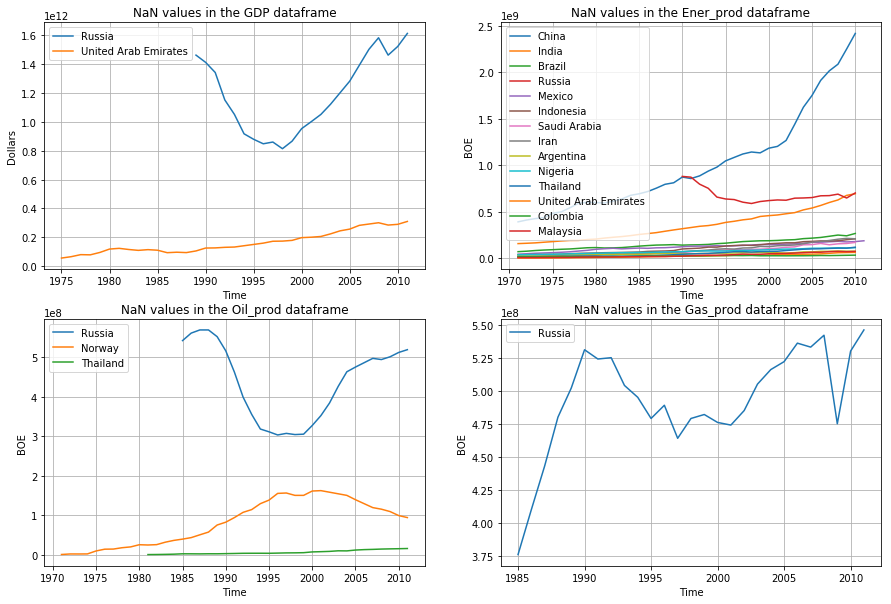

In [9]:
#Importing libraries and custom functions
import matplotlib.pylab as plt
from Functions import PlottingNaN
%matplotlib inline  

NaNIndexs = [GDPnan, Enernan, Oilnan, Gasnan]

PlottingNaN(GDP, Ener_use, Oil_prod, Gas_prod, NaNIndexs, Columns)

Then, data related with countries that are affected greatly by the presence of *nan* values are discarded. As can be seen in the previous figure, data related with *Russia* presents not defined values in each of the dataframes. What is more important, it presents a considerable amount of not defined values in most of the dataframes. As result, data related with that country will be dropped to reduce uncertainty related with calculations using that data.

In [10]:
#Dropping data related with Russia
GDP.drop([8], inplace=True)
Ener_use.drop([8], inplace=True)
Oil_prod.drop([8], inplace=True)
Gas_prod.drop([8], inplace=True)
Population.drop([8], inplace=True)

The rest of the not defined values will be replaced using adjacent data found on each of their corresponding rows. This is possible using the *pandas* *fillna* function.

In [11]:
#Filling nan values with adjacent data in the same rows
GDP[Columns[1:]] = GDP[Columns[1:]].fillna(method='bfill',axis=1)
Oil_prod[Columns[1:]] = Oil_prod[Columns[1:]].fillna(method='bfill',axis=1)
Ener_use[Columns[1:]] = Ener_use[Columns[1:]].fillna(method='ffill',axis=1)
Ener_use[Columns[1:]] = Ener_use[Columns[1:]].fillna(method='bfill',axis=1)


The modified dataframes do not present *nan* values:

In [12]:
Names = ['GDP', 'Population', 'Ener_use', 'Oil_prod', 'Gas_prod']
NanVals = [GDP.isnull().values.sum(), Population.isnull().values.sum(), Ener_use.isnull().values.sum(),
           Oil_prod.isnull().values.sum(), Gas_prod.isnull().values.sum()]

Structures = np.zeros(shape=(5,3), dtype=int)
for n in range(len(Dataframes)):
    Structures[n,:] = [Dataframes[n].shape[0], Dataframes[n].shape[1], NanVals[n]]
    
display(pd.DataFrame({'Dataframe':Names,'NaN':Structures[:,2]}))

,Dataframe,NaN
0,GDP,0
1,Population,0
2,Ener_use,0
3,Oil_prod,0
4,Gas_prod,0


### Conditioning the dataframes

Renaming the daframes Indices and Columns is important to have a better understanding of the data visualization, applied in the next section.

In [13]:
#Renamig columns
RenamingCols = {}

index = 0   
for n in GDP['geo'].values:
    RenamingCols[GDP.index[index]] = n
    index+=1    
    
GDP = GDP[Columns[1:]].T.rename(columns=RenamingCols)
Ener_use = Ener_use[Columns[1:]].T.rename(columns=RenamingCols)
Oil_prod = Oil_prod[Columns[1:]].T.rename(columns=RenamingCols)
Gas_prod = Gas_prod[Columns[1:]].T.rename(columns=RenamingCols)
Population = Population[Columns[1:]].T.rename(columns=RenamingCols)

#Renaming rows
GDP.index = GDP.index.astype('int')
Population.index = Population.index.astype('int')
Ener_use.index = Ener_use.index.astype('int')
Oil_prod.index = Oil_prod.index.astype('int')


### Generating additional dataframes

Additional dataframes are required to measure the effects of the increment of the North American economies and the use of energy per citizen:

In [14]:
#Creating additional dataframes
GDP_percap = GDP.div(Population)
Ener_percap = Ener_use.div(Population)

#Renaming their rows
Gas_prod.index = Gas_prod.index.astype('int')
GDP_percap.index = GDP_percap.index.astype('int')

Example of a proprocessed dataframe:

### Example

In [15]:
GDP_percap.head(10)

,United States,China,United Kingdom,India,Brazil,Italy,Canada,Australia,Mexico,Indonesia,Saudi Arabia,Iran,Norway,Argentina,Nigeria,Thailand,United Arab Emirates,Colombia,Malaysia
1970,22761.904762,226.666667,17949.640288,364.620939,4711.437566,17723.880597,24418.604651,25546.875000,5384.615385,770.434783,22089.041096,7017.543860,32216.494845,7041.666667,1616.071429,929.539295,241702.127660,2755.656109,1916.666667
1971,23412.322275,236.686391,18458.781362,362.190813,5107.471853,17940.630798,25091.743119,25954.198473,5418.994413,804.237288,25573.770492,7815.699659,33759.590793,7336.065574,1797.556719,944.736842,203584.229391,2853.982301,2054.054054
1972,24413.145540,240.184758,19285.714286,352.331606,5600.000000,18416.206262,25990.990991,26541.353383,5675.675676,842.975207,29890.453834,8704.318937,35368.956743,7338.709677,1822.827939,959.079284,170570.570571,3008.658009,2203.539823
1973,25534.883721,253.107345,20499.108734,355.817875,6194.174757,19561.243144,27422.222222,26814.814815,5916.230366,887.096774,35469.448584,9190.938511,36868.686869,7420.634921,1880.199667,1027.363184,143073.047859,3126.582278,2396.551724
1974,25161.290323,253.318584,19928.825623,352.553542,6619.047619,20545.454545,28070.175439,27518.248175,6074.450085,929.133858,39093.484419,9528.301887,37844.611529,7695.312500,2025.931929,1046.004843,120594.479830,3239.669421,2529.411765
1975,24885.844749,270.358306,19572.953737,375.201288,6777.777778,20072.332731,28060.344828,27681.159420,6239.737274,946.564885,33916.554509,9021.406728,39650.872818,7547.892720,1876.971609,1070.921986,102527.075812,3233.870968,2491.803279
1976,25972.850679,261.472785,20106.761566,372.641509,7300.000000,21402.877698,29148.936170,28000.000000,6325.878594,992.537313,37851.662404,10267.062315,41687.344913,7283.018868,1978.527607,1140.552995,102318.392581,3320.158103,2712.000000
1977,26950.672646,277.310924,20603.907638,390.769231,7433.628319,21863.799283,29915.611814,28591.549296,6376.360809,1051.094891,38517.618469,9540.229885,43316.831683,7657.992565,2038.690476,1225.225225,107486.631016,3378.378378,2851.562500
1978,28177.777778,304.347826,21492.007105,403.903904,7474.137931,22459.893048,30708.333333,28671.328671,6772.727273,1092.198582,34677.419355,7944.444444,44827.586207,7216.117216,1861.471861,1321.585903,92840.375587,3581.132075,2977.099237
1979,28728.070175,323.469388,22380.106572,374.449339,7847.457627,23665.480427,31481.481481,29448.275862,7237.813885,1145.833333,36710.239651,6863.270777,46683.046683,7833.935018,1932.773109,1362.068966,100525.210084,3690.036900,3155.555556


<a id='eda'></a>
## Exploratory Data Analysis

As mentioned in the project objective section, the goal of this project is to understand the GDP of the North American countries in terms of their productions of hydrocarbons, while understanding their purchase power of their citizens based on their use of energy. 

### Economic growth , use of energy and production of hydrocarbons

To achieved what it was mentioned in the objective of this project, the GDP of the North American countries are plotted against their use of energy and their productions of hydrocarbons. This visualization shows how related are their GDP to their uses of energy. Furthermore, the visualization also helps us to understand how dependent the North American countries are to the use of their produced hydrocarbons for the generation of energy.

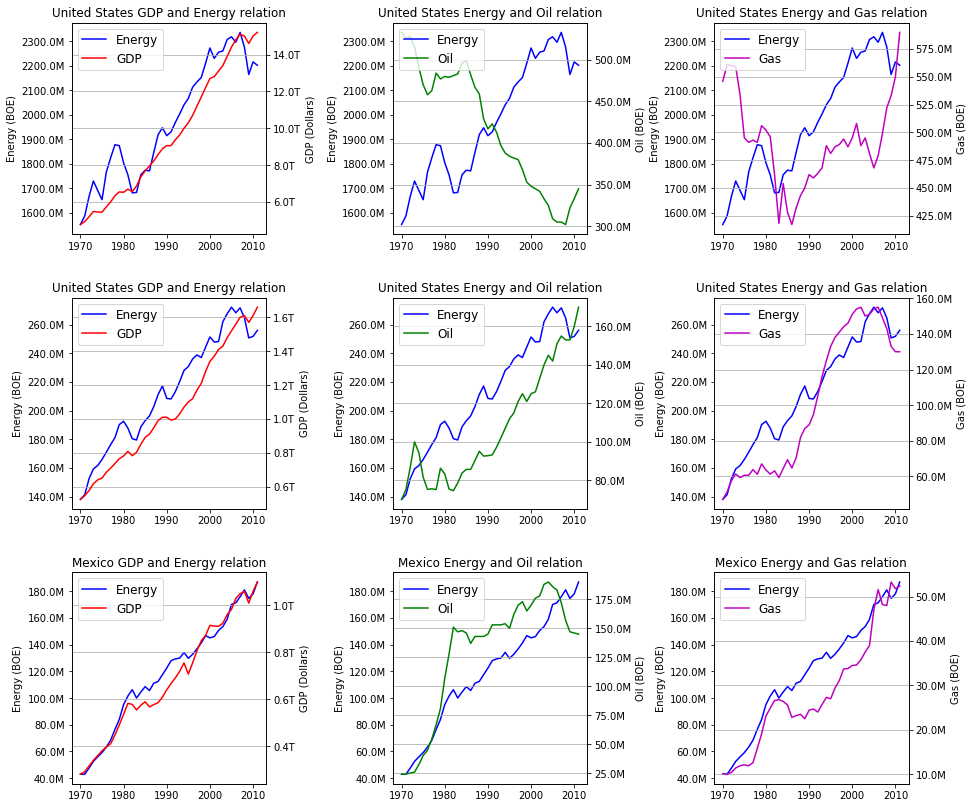

In [16]:
#Importing custom functions
from Functions import NorthAmeComparison

#Defining north american countries
Countries = ['United States', 'Canada', 'Mexico']

#Visualization the GDP vs use of energy and energy vs produced hydrocarbons
NorthAmeComparison(GDP, Population, Oil_prod, Ener_use, Gas_prod, Countries)

It can be observed in the previous figure that the North American countries GDPs and their consumptions of energy have similar behaviors, having a high probability of being correlated. In the same figure can also be observed how much of the north American countries used energy are generated from their produced hydrocarbons. This tell us that some countries depend more than others on this natural resource. 

Although it appears that the behavior of the used energy for the United states is not highly correlated with the production of hydrocarbons, it remains related at some degree. On the other side, Canada and Mexico are highly dependent on their production of hydrocarbons for the generation of energy. Nonetheless, Mexico depends more on the oil produced locally, while Canada depends in similar proportions on both hydrocarbons produced, oil and natural gas.

#### Correlations

Unfortunately, the previous visualization is not enough to determine dependencies among the North American countries GDPs and their production of hydrocarbons, even when it gives a good idea of the probable relationships. To increase certainty about those dependencies, it is necessary to calculate the correlations among the two variables of interest, the countries GDPs and their production of hydrocarbons.

In [17]:
#Importing custom functions
from Functions import CorreDataFrames

#Array to identify the datafrmes to use
FramesLab = ['GDP', 'Ener_use', 'Oil_prod', 'Gas_prod']

#Generating a dataframe for the US information
Country = 'United States'
Dataframes = [GDP[Country], Ener_use[Country], Oil_prod[Country],
                  Gas_prod[Country]]
CorrUS = CorreDataFrames(Dataframes, FramesLab)

#Generating a dataframe for the CA information
Country = 'Canada'
Dataframes = [GDP[Country], Ener_use[Country], Oil_prod[Country],
                  Gas_prod[Country]]
CorrCA = CorreDataFrames(Dataframes, FramesLab)

#Generating a dataframe for the MX information
Country = 'Mexico'
Dataframes = [GDP[Country], Ener_use[Country], Oil_prod[Country],
                  Gas_prod[Country]]
CorrMX = CorreDataFrames(Dataframes, FramesLab)


Visualizing correlations among the variables of interest for the North American countries:

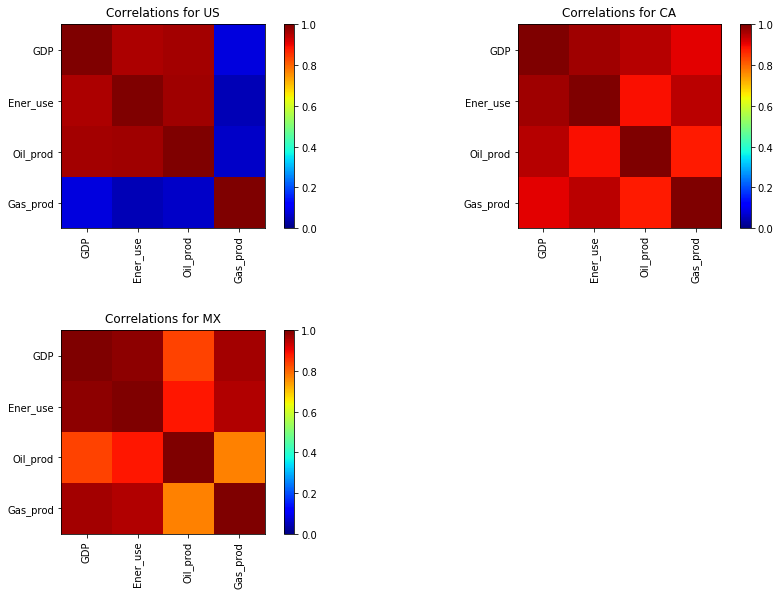

In [18]:
#Importing custom functions
from Functions import CountriesNortAmeCorr

#Plotting correlations
CountriesNortAmeCorr(CorrUS, CorrCA, CorrMX, FramesLab)

With the last visualization it can be concluded that there is a dependency of the North American countries to the production of hydrocarbons for the increment of their economies. However, that dependency is different for each type of hydrocarbon, and some countries depends more than others from each of them.

### Consumption of energy per capita and the quality of life

The economy of any country is reflected in the purchase power of their citizens, the amount of goods that they can buy with their salaries. In the previous analysis it was observed that there is a strong correlation between the GDP and the energy used, at least for the North American countries. 

Then, it is important to understand how much the availability of energy helps the citizens to produce more and as a consequence to increase its participation on the country's economy, and therefore, to the generation of the GDP. This, considering that the GDP generated from a country is generated equally from its population.

For this analysis are used the last two dataframes generated in the *Data Wrangling* section, the GDP_percap and the Ener_percap dataframes, containing information about the GDP per capita and the Energy used per capita, respectively.

#### GDP per capita (statistics)

A good description of the data information can be observed calculating the statistics of the mentioned dataframes, as follow: 

In [19]:
#Displaying statistics related with the GDP per capita
Countries = ['United States', 'Canada', 'Mexico']
display(GDP_percap[Countries].describe())


,United States,Canada,Mexico
count,42.000000,42.000000,42.000000
mean,36447.623953,36998.277527,7742.693651
std,8865.427923,7228.645007,1141.108335
min,22761.904762,24418.604651,5384.615385
25%,28475.495805,31545.893720,7172.354344
50%,35685.138340,36175.297802,7745.232625
75%,45004.665920,44057.213408,8719.245283
max,50166.112957,48484.848485,9375.000000


#### Enercy consumption per capita (statistics)

In [20]:
#Displaying statistics related with the Energy use per capita
Countries = ['United States', 'Canada', 'Mexico']
display(Ener_percap[Countries].describe())

,United States,Canada,Mexico
count,42.000000,42.000000,42.000000
mean,7.683479,7.624900,1.336337
std,0.305708,0.466939,0.221125
min,7.075071,6.423373,0.800419
25%,7.527137,7.383171,1.341653
50%,7.762511,7.600003,1.412366
75%,7.847190,7.950320,1.462189
max,8.347831,8.427171,1.588498


The max parameter of the statistics shows that Mexico is the North American country with less purchase power, considering the GDP per capita as purchase power, and has the smallest max parameter for the energy used per capita. This tendency can be observed with the United states, which has the bigger purchase power per capita and their citizens use more energy than the rest of North America. There is an obvious relationship among these two variables.

The same behavior can be observed for most of the data available in the datraframes. This can be observed by analyzing the minimum values, the first quartile (Q1) values, the second quartile (Q2) values and the third quartile (Q3) values for the GDP per capita and the use of energy per capita. 

However, the minimum and the Q3 values for Canada present an interesting scenario, a scenario where people from Canada were the ones with more purchase power and with similar use of energy as the United States. This means that at certain point in time people from Canada were living better than the rest of North America. Nonetheless, the amount of citizens in which the GDP and the Energy available was divided needs to be considered.

Lastly, Mexico shows the less variability among the GDP and the use of energy per capita, while Canada shows more variability in terms of the Energy used per capita and the United states shows more variability for the GDP per capita. This means that Mexico is the North American country with the smallest growth in terms of the GDP and the use of Energy per capita. Nevertheless, it is important to consider the amount of population that each of the North American countries have.  

#### Visualizaing GDP per capita Vs Energy consumtion per capita

The following visualization helps to understand better the relationship between the GDP per capita, the Energy consumption per capita and population for each country through 1970 to 2017.

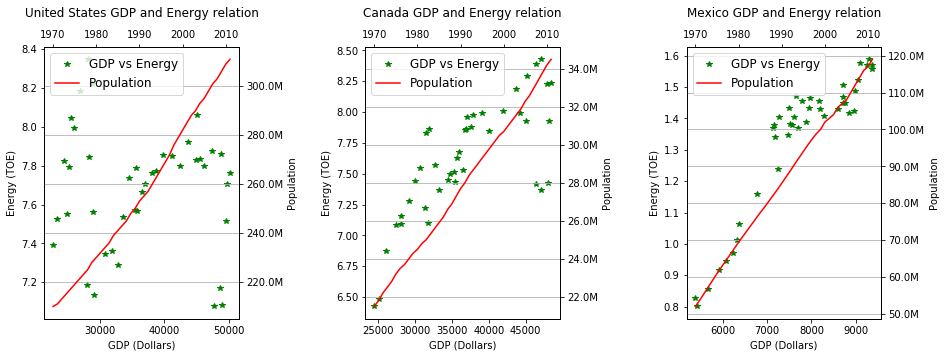

In [21]:
#Importing custom functions
from Functions import NorthAmeComparisonPC

#Visualization
NorthAmeComparisonPC(GDP_percap, Population, Ener_percap, Countries);

The previous figure explains the interested scenario mentioned in the previous subsection, where Canadians were the citizens with most acquisition power in North America. That was due of its population, since the energy available was distributed among less people when compared with the rest of North America. 

It can also be observed the almost linear relationship of the GDP per capita and the Energy used per capita for Mexico and Canada, which can be used to predict its behavior in the future. United States presents a different behavior. An additional study of the data can be implemented considering the previously found relationship among the Energy used and the production of hydrocarbons, as presented next.

#### Considering the dependecy on the production of hydrocarbons

The North American countries dependencies on the production of hydrocarbons for their generation of energy and their GDP can be observed in the next figure. For the case of Mexico, it can be observed a highly dependency of the population power acquisition on the production of hydrocarbons. A similar dependency can be observed in Canada, but in less degree. United States presents a different behavior, it does not rely that much in their production of oil, at least with the available data which consider only the locally produced hydrocarbons.

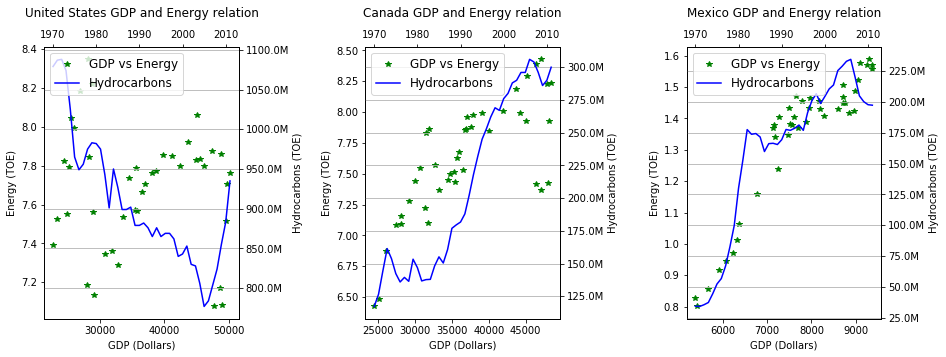

In [22]:
#importing custom functions
from Functions import NorthAmeComparisonPC_Oil

#Considering the dependecy on the production of hydrocarbons 
Hidrocar = Oil_prod.add(Gas_prod)
NorthAmeComparisonPC_Oil(GDP_percap, Hidrocar, Ener_percap, Countries);

<a id='conclusions'></a>
## Conclusions


As summary, it was found an obvious dependency between the GDP and the production of hydrocarbons for the North American countries, as explained in the Exploratory Data Analysis section. Additionally, it was found that the energy consumption per capita is a good metric to understand how much produce the country's population to generate the GDP, which will increase depending on how much energy is available to be used for the country’s population.

However, the data obtained for this project was limited, in terms of outdated information, the amount of hydrocarbons imported to generate energy, a realistic GDP Purchase Power Parity (PPP) and more complete information about other types of sources for the generation of energy.

The limitations affected the analysis by constraining the used hydrocarbons to those produced internally, to consider the power purchase parity as the GDP, and to understand how much other sources of energy contributed to the generation of the North American countries GDPs. It also affected to present an outdated analysis, given that not all the available csv files contain recent information.

Nonetheless, the presented analysis helps to explain, with considerable solid basis, the economy of the North American countries in terms of their GDP, Energy consumption and production of hydrocarbons through 1970 to 2010. 